In [2]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv("data.csv")

y = df['y']
x = df.drop(['y'], axis=1)

x=x.values.ravel()##matplotlib takes 1d array so ravel is needed.Beacuse this is the coffeicient of one x
print(x)

plt.scatter(x,y)



[ 36  69 -97  69 -14  89  -9   5 -96  49 -88  78  95 -10  41  49 -24 -85
  -7 -82  30  72 -38  76 -29 -92  79  42 -93  68  91 -46  55 -74  64 -48
  30  70  95  84 -58 -88 -90 -17  38  88 -55 -54  55  59]



[-4.25113996]
-107.60129073654957


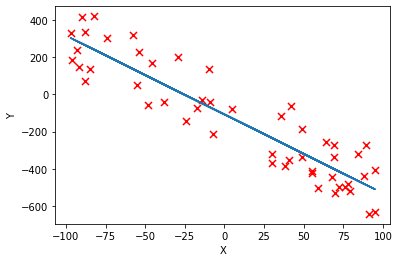

In [3]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np

def main():
    lr = LinearRegression()

    df = pd.read_csv("data.csv")

    y = df['y']
    x = df.drop(['y'], axis=1)##sklearn takes 2d array so ravel not needed

#     print(x)
    print()

    lr.fit(x,y)
    print(lr.coef_)#m
    print(lr.intercept_)#intercept(c)
    
    b=(lr.intercept_,lr.coef_[0])
    plot_regresssion_line(x,y,b)    

    
##SECOND VALUE
def plot_regresssion_line(x,y,b):
    
    plt.scatter(x,y,color = "r", marker = "x", s=50)
    
    #predicted response vector
    y_pred = b[0] + b[1]*x
    
    #plotting the regression line
    plt.plot(x,y_pred)
    
    plt.xlabel("X")
    plt.ylabel("Y")
    
    plt.show()
    
main()

In [4]:

lr.predict([[19]])

NameError: name 'lr' is not defined

# Gradient Descent


In [6]:
(Solver algorithm):training the machine
    
1.Least Square Fit

2.Batch Gradient Descent:[wi = wi - alpha*(dJ/dw)]
gradient overshoot

Penalty:
Ridge Regression
Lasso Regression
Elastic Net

In [7]:
def grad_desc(x, y, max_iter, alpha):
    
    m = 0
    c = 0 
    n = np.size(x)
    for i in range(max_iter):
        
        n = np.size(x)
        
        m = m - (1/len(x))*alpha*((2*m*np.sum(x**2))+(2*c*np.sum(x))-(2*np.sum(x*y)))
        
        c = c - (1/len(x))*alpha*((2*m*np.sum(x))+(2*c*n)-(2*np.sum(y)))
        
    return m, c

    

data = pd.read_csv('data.csv')
x = data['x']
y = data['y']

xx = grad_desc(x,y,70000,0.0001)

print("m : " + str(xx[0]) + " , c : " + str(xx[1]) )

m : -4.251140149179151 , c : -107.60118257588466


In [17]:
from sklearn.datasets import load_boston
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np

data = load_boston()
data

df = pd.DataFrame(data.data, columns=data.feature_names)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [18]:
df.shape

(506, 13)

In [63]:
x=df.values
x.size

6578

In [73]:
y=data.target
y.size

506

In [92]:
from sklearn.datasets import load_boston
import pandas as pd
from sklearn.model_selection import train_test_split

data = load_boston()
df = pd.DataFrame(data.data, columns = data.feature_names)

x_train, x_test, y_train, y_test = train_test_split(df, data.target, test_size=0.10, random_state = 42)

l = LinearRegression()
l.fit(x_train, y_train)

print(x_train)
print(y_train)

b=(l.coef_,l.intercept_)

x_test.values[0]
l.predict([x_test.values[0]])
print(l.predict([x_test.values[0]]))
print([y_test[0]])



[29.3639579]
[23.6]


# Ridge Regression

In [1]:
from sklearn.linear_model import Ridge,RidgeCV

rcv = RidgeCV(alphas = [0.001, 0.005,0.05,0.5,0.1,1.0,2.0,5.0])

rcv.fit(x_train, y_train)

NameError: name 'x_train' is not defined

In [77]:
rcv.alpha_## gives the  value of alpha



0.05

In [107]:
r =  Ridge(alpha=0.05, solver="sag", max_iter=10000, tol=0.001)#if max ietration is less it wont converge.There should be balance betweeb tol and  max_iter
r.fit(x_train, y_train)

Ridge(alpha=0.05, copy_X=True, fit_intercept=True, max_iter=10000,
      normalize=False, random_state=None, solver='sag', tol=0.001)

In [108]:
r.score(x_train,y_train)

0.7170125767032339

# L1 penalty or Lasso regression

In [99]:
from sklearn.linear_model import Lasso,LassoCV

lcv = LassoCV(alphas = [0.001, 0.005,0.05,0.5,0.1,1.0,2.0,5.0])

lcv.fit(x_train, y_train)


C:\Users\Kashmiri\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


LassoCV(alphas=[0.001, 0.005, 0.05, 0.5, 0.1, 1.0, 2.0, 5.0], copy_X=True,
        cv='warn', eps=0.001, fit_intercept=True, max_iter=1000, n_alphas=100,
        n_jobs=None, normalize=False, positive=False, precompute='auto',
        random_state=None, selection='cyclic', tol=0.0001, verbose=False)

In [100]:
lcv.alpha_

0.001

In [101]:
l =  Lasso(alpha=0.001, max_iter=10000, tol=0.001)
l.fit(x_train, y_train)

Lasso(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=10000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.001, warm_start=False)

In [102]:
l.score(x_test,y_test)

0.7601088108238945


# Elastic Net